In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("coffees.csv")
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


### Questions to answer:
1) who are the contributors to this dataset, and when are the contributions generally made?

2) what are the department's weekday coffee habits?

3) how much coffee are people drinking?

# 1) Examine the data

In [3]:
# 1) "testing":
data.iloc[2] 

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [4]:
#2) "NaN":

print(type(data.coffees)) #gives series
print(type(data)) #gives dataframe
data.coffees[:5] 


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

In [5]:
print('dataset lenght %d' %len(data))

dataset lenght 671


In [6]:
data.describe() #gives the count(length), unique values, top values and frequenct


,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2011-10-14 10:02:00,12358.0,Quentin
freq,1,2,367


In [7]:
#let's look at the dataframe where coffees is null.

In [8]:
data.coffees.isnull()

data[data.coffees.isnull()] 

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


In [9]:
# 3) data type problems:

data.dtypes #they're all objects but we want coffee to be numerical (int), and timestamp column to be time stamp

timestamp      object
coffees        object
contributor    object
dtype: object

In [10]:
#let's look at the timestamp column:
print(data.timestamp[0])
print(type(data.timestamp[0])) 

2011-10-03 08:22:00
<class 'str'>


### Problems we found
1) There is a string "testing" on the coffee column

2) dtype of Coffee column is object/string, we want numerical

3) dtype of timestamp column is object/string, we want time stamp

4) Coffees column contains NaN values

5) After march, the entries are getting spaced

# 2) Data cleaning:

In [11]:
# 1) let's get rid of the "testing" and convert coffee column to numeric:

data.coffees = pd.to_numeric(data.coffees, errors= 'coerce') 
print(data.head())
print(data.dtypes) #we can see it's a numerical value, float

             timestamp  coffees contributor
0  2011-10-03 08:22:00    397.0     Quentin
1  2011-10-04 11:48:00    410.0     Quentin
2  2011-10-05 07:02:00      NaN     Anthony
3  2011-10-05 08:25:00      NaN     Quentin
4  2011-10-05 10:47:00    464.0     Quentin
timestamp       object
coffees        float64
contributor     object
dtype: object


In [12]:
# 2) let's drop those NAs:

data = data.dropna() 
data.head()


,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


In [13]:
# 3) let's turn coffe column to integers:

data.coffees = data.coffees.astype(int)
print(data.dtypes) #they're integers
data.head()

timestamp      object
coffees         int64
contributor    object
dtype: object


,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


In [14]:
#let's turn timestamp into a date time
data.timestamp = pd.to_datetime(data.timestamp)
data.dtypes

timestamp      datetime64[ns]
coffees                 int64
contributor            object
dtype: object

In [15]:
data.describe(include='all') 

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [16]:
data.head()


,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


In [17]:
data.describe(include = "all")

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [18]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


# Time series at a glance:

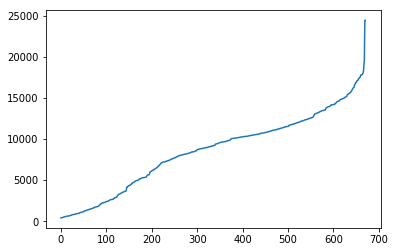

In [19]:
data.coffees.plot() 

# <span style="color:red">Change 1)</span>

#### ORIGINAL CODE: 

#### data.plot(x=data.timestamp, style=".-")

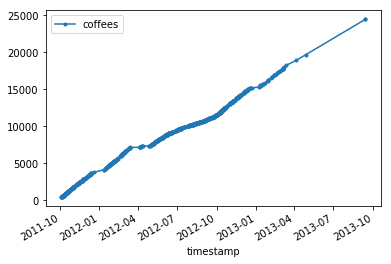

In [20]:
data.plot(x="timestamp", style=".-")




In [21]:
data.tail(n=10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


In [22]:
data = data[data.timestamp < '2013-03-01'] #we chopped of everything after march 1
data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


# 2) Who Contributed to our dataset?

In [23]:
data.contributor.value_counts()


Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

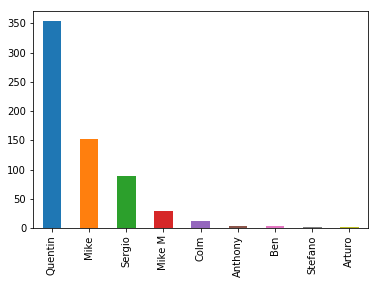

In [24]:
data.contributor.value_counts().plot(kind='bar')

### On which weekdays were contributions made?

In [25]:
#create a weekdays column
weekdays = data.timestamp.dt.weekday #because this is a timestamp column it has acces to .dt attribute. .dt stands for date, and weekday is a method to return weekdays
#0=M....6=S
weekdays
data = data.assign(weekdays=weekdays)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


In [26]:
#add names to weekdays:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}

data.weekdays= data.weekdays.apply(lambda x: weekday_dict[x])

In [27]:
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


In [28]:
weekday_counts = data.groupby('weekdays').count()
weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Friday,114,114,114
Monday,145,145,145
Saturday,29,29,29
Sunday,13,13,13
Thursday,117,117,117
Tuesday,97,97,97
Wednesday,131,131,131


In [29]:
weekday_counts = weekday_counts.loc[weekday_names]

In [30]:
weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


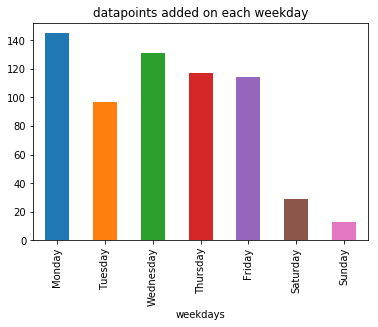

In [31]:
weekday_counts.timestamp.plot(kind= 'bar', title = "datapoints added on each weekday")


# 3) What are the department's weekday coffee habits?


In [32]:

data.index = data.timestamp

#since we have the timestamps as our indexes, we don't need the timestamp column anymore:
data.drop(['timestamp'], axis=1, inplace = True) #axis =1 means column


In [33]:
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


In [34]:
#let's add some rows at midnight on every day.
#we want to insert rows everyday at midnight, the reason is we have multiple values at different times for the same day 
#but we want the one total amount of coffee for each day. so we want one value per day
#so we will add one row every single day at midnight and finding the value of the number of coffees at that point, and then dropping the rows that are not at midnight

midnights = pd.date_range(data.index[0], data.index[-1], freq = "D", normalize= True) 
midnights # they don't have times anymore





DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

In [35]:
#let's take the union of the existing and new indices:
new_index = midnights.union(data.index)
new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

In [36]:
#we will reindex with the new index
unsampled_data = data.reindex(new_index)
unsampled_data.head(10) 


,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


In [37]:
# now we will fill these NaNs to find out the total coffee consumed each day.
#we will use interpolation for this.
unsampled_data = unsampled_data.interpolate(method='time') 
unsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thursday
2011-10-06 10:04:00,513.000000,Quentin,Thursday


In [38]:
daily_data = unsampled_data.resample("D") 
daily_data = unsampled_data.resample("D").asfreq() 

daily_data



,coffees,contributor,weekdays
2011-10-03,NaN,NaN,NaN
2011-10-04,404.408262,NaN,NaN
2011-10-05,438.664249,NaN,NaN
2011-10-06,494.066298,NaN,NaN
2011-10-07,572.844311,NaN,NaN
2011-10-08,637.237253,NaN,NaN
2011-10-09,644.729448,NaN,NaN
2011-10-10,652.924658,NaN,NaN
2011-10-11,734.573206,NaN,NaN
2011-10-12,780.924214,NaN,NaN


In [39]:
#we don't need the contributor column
daily_data = daily_data.drop(['contributor'], axis =1)
#we need the weekdays information, however we need them to show the days:
daily_data['weekdays'] = daily_data.index.weekday_name



In [40]:
daily_data.head(10)

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday
2011-10-08,637.237253,Saturday
2011-10-09,644.729448,Sunday
2011-10-10,652.924658,Monday
2011-10-11,734.573206,Tuesday
2011-10-12,780.924214,Wednesday


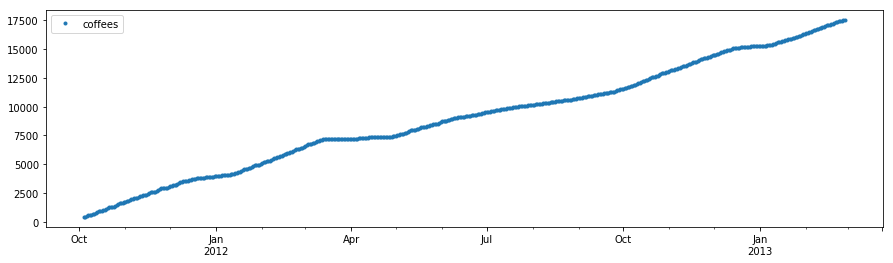

In [41]:
#let's plot this daily data
daily_data.plot(figsize = (15, 4), style = ".")

In [42]:
#let's begin by figuring out how many coffees are made on any given day
coffees_made = daily_data.coffees.diff().shift(-1)

daily_data['coffees_made_today'] = coffees_made
daily_data.head(10)

,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941
2011-10-08,637.237253,Saturday,7.492196
2011-10-09,644.729448,Sunday,8.195209
2011-10-10,652.924658,Monday,81.648549
2011-10-11,734.573206,Tuesday,46.351008
2011-10-12,780.924214,Wednesday,71.254295


In [43]:
#now we can groupd this by weekday, take the mean and grab the coffees_made_today column. 

coffees_by_day = daily_data.groupby('weekdays').mean().coffees_made_today 

In [44]:
#let's order this series and then plot it:
coffees_by_day = coffees_by_day[weekday_names]
coffees_by_day

weekdays
Monday       37.802404
Tuesday      39.132964
Wednesday    47.640057
Thursday     43.500824
Friday       34.138034
Saturday     16.299858
Sunday       15.768215
Name: coffees_made_today, dtype: float64

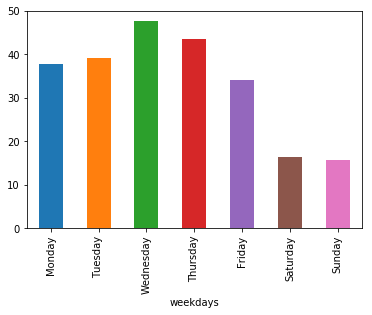

In [45]:
coffees_by_day.plot(kind='bar')

#  4)How many coffees people drink per day?

In [46]:
#we will pull the data on how many people were in the department:
people = pd.read_csv("department_members.csv",index_col=[0], parse_dates =True)

people.head()


,members
date,
2011-08-31,12
2011-09-30,14
2011-10-31,14
2011-11-30,14
2011-12-31,15


In [47]:
#we need to join the datasets of people and daily data. we created daily_data to have coffee amounts made daily.
daily_data = daily_data.join(people, how='outer').interpolate(method='nearest')

daily_data.head(10)

,coffees,weekdays,coffees_made_today,members
2011-08-31,NaN,NaN,NaN,12.0
2011-09-30,NaN,NaN,NaN,14.0
2011-10-03,NaN,Monday,NaN,14.0
2011-10-04,404.408262,Tuesday,34.255987,14.0
2011-10-05,438.664249,Wednesday,55.402049,14.0
2011-10-06,494.066298,Thursday,78.778013,14.0
2011-10-07,572.844311,Friday,64.392941,14.0
2011-10-08,637.237253,Saturday,7.492196,14.0
2011-10-09,644.729448,Sunday,8.195209,14.0
2011-10-10,652.924658,Monday,81.648549,14.0


In [48]:
#let's create a column for the number of coffees consumer per person:

daily_data['coffees_per_person'] = daily_data.coffees_made_today / daily_data.members

#let's drop those NaNs'
daily_data.dropna(inplace=True)
daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157


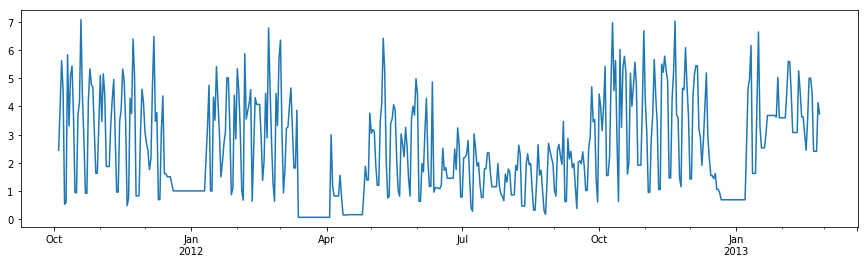

In [49]:
#we can now plot this column:
daily_data.coffees_per_person.plot(figsize = (15,4))

In [50]:
#those are strange plateaus. we'll pull another dataset, telling us when the machine was broken:
machine_status = pd.read_csv("coffee_status.csv", parse_dates =['date'], index_col ='date')

machine_status.head()
machine_status.describe()

,status
count,602
unique,2
top,OK
freq,514


In [51]:

machine_status.status.value_counts()

OK        514
BROKEN     88
Name: status, dtype: int64

# <span style="color:red">Change 2)</span> 

#### ORIGINAL CODE: 

#### numerical_status = machine_status.status == "OK" 

#### numerical_status.plot()

In [52]:
#let's plot this by its index = date:
#since the date column is the datetime object, and the status column is the string object, we need a numerical status:
import numpy as np

numerical_status2= pd.DataFrame(index=machine_status.index, columns=["OK"])
numerical_status=[]
#numerical_status #it's a True and False series, which are numerical values 1=true, 0=false, so we can plot this
for i in range(0,602):
    if machine_status.status[i] =="OK":
        numerical_status.append(1)
    else:
        numerical_status.append(0)
        
numerical_status2.OK = numerical_status
numerical_status2.OK.value_counts()


    


1    514
0     88
Name: OK, dtype: int64

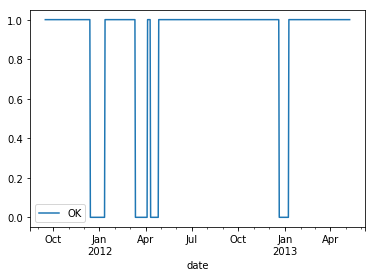

In [53]:
numerical_status2.plot()

In [54]:
#let's join the datasets daily_data and machine_status:
daily_data = daily_data.join(machine_status)
daily_data.head()


,coffees,weekdays,coffees_made_today,members,coffees_per_person,status
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001,OK
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496,OK
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157,OK


In [55]:
#let's add our numerical_status to our daily_data dataset:
daily_data['numerical_status'] = (daily_data.status == "OK").astype(int)
daily_data.head()


,coffees,weekdays,coffees_made_today,members,coffees_per_person,status,numerical_status
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK,1
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK,1
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001,OK,1
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496,OK,1
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157,OK,1


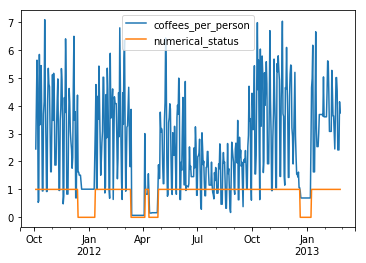

In [56]:
#let's plot the coffees per person and the numerical status, which states if the machine is ok (working) or not 

daily_data[['coffees_per_person', 'numerical_status']].plot()

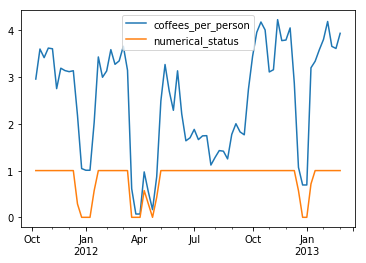

In [57]:
#let's resample this weekly instead of daily, taking the mean of each week to get a weekly value:
weekly_data = daily_data.resample('W').mean()
#weekly_data.head()
weekly_data[['coffees_per_person', 'numerical_status']].plot()